# Results Exploration

## Setup

In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
from os import path as os_path
import scipy.stats as stats

from Tester import tester_constants

SIGNIFICANCE_LEVEL = 0.05

In [18]:
file_name = "results_half_all.csv"

dtypes = {
    "after window size": "float64", 
    "drift description": "string",
    "drifted features types": "string",
    "tree size": "int64",
    "after accuracy decrease": "float64",
    "after retrain accuracy": "float64",
    "after retrain accuracy increase": "float64",
    "before after retrain accuracy": "float64",
    "before after retrain accuracy increase": "float64"
}
results_df = read_csv(os_path.join(tester_constants.RESULTS_FULL_PATH, file_name), dtype=dtypes)
for column in results_df.columns:
    if column not in dtypes:
        if column.endswith("features") or column.endswith("indices"):
            dtypes[column] = "object"
        else:
            dtypes[column] = "float64"
# trying to fix all dtypes
results_df = read_csv(os_path.join(tester_constants.RESULTS_FULL_PATH, file_name), dtype=dtypes)

accuracy_increase_columns = [column for column in results_df.columns if column.endswith("accuracy increase")]
wasted_efforts_columns = [column for column in results_df.columns if column.endswith("wasted effort")]

print(f"Datasets count: {len(results_df['drift description'].apply(lambda x: x.split('__')[0]).unique())}")

results_df.head()

C:\Users\yoavz\AppData\Local\Temp\ipykernel_17312\4025062840.py:14: DtypeWarning: Columns (10,11,15,16,20,21,25,26,30,35,40,41,45,46,50,51,55,60,61,65,66,70,71,75,76,80,81,85,90,91,95,96,100,101,105) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df = read_csv(os_path.join(tester_constants.RESULTS_FULL_PATH, file_name), dtype=dtypes)


Datasets count: 39


,drift description,after size,drift size,drifted features types,tree size,after accuracy decrease,after retrain accuracy,after retrain accuracy increase,before after retrain accuracy,before after retrain accuracy increase,...,fuzzy participation STAT_BARINEL_Paths_Difference faulty features,fuzzy participation STAT_BARINEL_Paths_Difference faulty nodes indicies,fuzzy participation STAT_BARINEL_Paths_Difference fix accuracy,fuzzy participation STAT_BARINEL_Paths_Difference fix accuracy increase,fuzzy participation STAT_BARINEL_Paths_Difference wasted effort,fuzzy participation STAT_SFLDT faulty features,fuzzy participation STAT_SFLDT faulty nodes indicies,fuzzy participation STAT_SFLDT fix accuracy,fuzzy participation STAT_SFLDT fix accuracy increase,fuzzy participation STAT_SFLDT wasted effort
0,acute-inflammation__NumericFeature[f4;+0.5std]...,10.0,2.0,"numeric, numeric",7,87.5,70.833333,-16.666667,100.0,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acute-inflammation__NumericFeature[f4;+0.5std]...,5.0,2.0,"numeric, numeric",7,87.5,70.833333,-16.666667,100.0,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acute-inflammation__NumericFeature[f4;+0.5std]...,6.0,2.0,"numeric, numeric",7,87.5,87.500000,0.000000,100.0,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,acute-inflammation__NumericFeature[f4;+0.5std]...,7.0,2.0,"numeric, numeric",7,87.5,62.500000,-25.000000,100.0,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acute-inflammation__NumericFeature[f4;+0.5std]...,8.0,2.0,"numeric, numeric",7,87.5,66.666667,-20.833333,100.0,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for c, d in zip(results_df.columns[10: ], results_df.dtypes[10:]):
    if c.endswith("features") or c.endswith("indicies"):
        assert d == "object", f"Column {c} has type {d} instead of object"
    else:
        assert d == "float64", f"Column {c} has type {d} instead of float64"

## Overall Performance

In [21]:
# filter results with after window size 1
relevant_columns = ["drifted features types"] + accuracy_increase_columns# + wasted_efforts_columns
results_df_after_size_1 = results_df[relevant_columns]

numeric_results_filter = lambda features_types: all([feature_type == "numeric" for feature_type in features_types.split(", ")])
categorical_results_filter = lambda features_types: all([feature_type == "binary" for feature_type in features_types.split(", ")])

get_all_features_types = lambda features_types: "numeric" if numeric_results_filter(features_types) else "binary" if categorical_results_filter(features_types) else "mixed"

results_df_after_size_1.loc[:, "drifted features types"] = results_df_after_size_1["drifted features types"].apply(get_all_features_types)
# group by features types and get the mean of each group
results_df_after_size_1_grouped = results_df_after_size_1.groupby("drifted features types").mean().reset_index()
# Transpose the table and make the first row the header
results_df_after_size_1_grouped = results_df_after_size_1_grouped.T
results_df_after_size_1_grouped.columns = results_df_after_size_1_grouped.iloc[0]
results_df_after_size_1_grouped = results_df_after_size_1_grouped[1:]
results_df_after_size_1_grouped

drifted features types,binary,mixed,numeric
after retrain accuracy increase,8.333333,13.826664,15.123154
before after retrain accuracy increase,15.895062,6.972158,19.282604
BARINEL fix accuracy increase,0.0,2.488392,7.071232
BARINEL_Features fix accuracy increase,-6.018519,1.231198,10.194139
BARINEL_Features_Paths_After fix accuracy increase,-6.018519,2.497804,9.684659
BARINEL_Features_Paths_Difference fix accuracy increase,-6.018519,3.887216,13.438231
BARINEL_Paths_After fix accuracy increase,0.0,2.945553,7.692437
BARINEL_Paths_Difference fix accuracy increase,-4.166667,-2.463293,12.489711
SFLDT_Features fix accuracy increase,-6.018519,5.093539,10.063474
STAT_BARINEL_Paths_After fix accuracy increase,-4.166667,-2.463293,8.817025


## Effect of Test Size

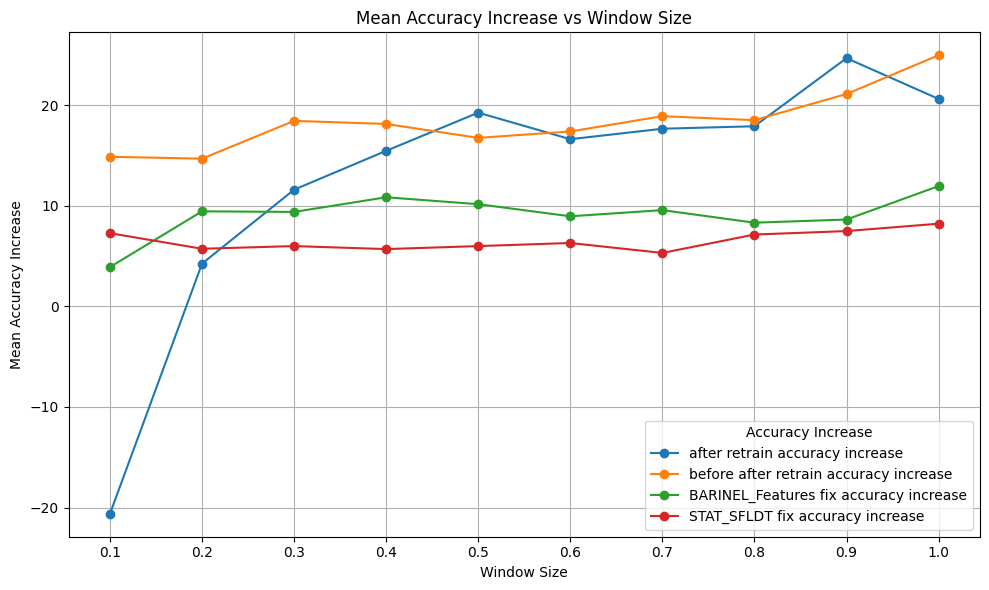

,after window size,after retrain accuracy increase,before after retrain accuracy increase,BARINEL_Features fix accuracy increase,STAT_SFLDT fix accuracy increase
0,0.1,-20.622078,14.867043,3.904801,7.271026
1,0.2,4.245967,14.676777,9.443463,5.723413
2,0.3,11.595309,18.436047,9.384331,5.989076
3,0.4,15.456151,18.129253,10.839996,5.689337
4,0.5,19.253060,16.744718,10.153457,5.988761
5,0.6,16.612420,17.382101,8.950771,6.295009
6,0.7,17.653286,18.903122,9.564096,5.306877
7,0.8,17.900944,18.505131,8.314516,7.135377
8,0.9,24.668163,21.103073,8.628516,7.480352
9,1.0,20.618739,24.957102,11.952292,8.213525


In [ ]:
relevant_columns = ["after window size"] + accuracy_increase_columns
grouped_results = results_df[relevant_columns].groupby("after window size").mean().reset_index().sort_values(by="after window size")

# Plotting the results
plt.figure(figsize=(10, 6))
for column in relevant_columns[1: ]:
	plt.plot(grouped_results["after window size"], grouped_results[column], marker='o', label=column)
plt.title("Mean Accuracy Increase vs Window Size")
plt.xlabel("Window Size")
plt.ylabel("Mean Accuracy Increase")
plt.xticks(grouped_results["after window size"])
plt.grid(True)
plt.legend(relevant_columns[1: ], title="Accuracy Increase")
plt.tight_layout()
plt.show()
grouped_results

## Significance Difference Compared to STAT_SFLDT

In [ ]:
old_model = "STAT_SFLDT"
new_model = "BARINEL_Features"
column_suffix = " fix accuracy increase"
for after_size in tester_constants.AFTER_WINDOW_TEST_SIZES:
    after_size_results_df = results_df[results_df["after window size"] == after_size]

    # Get the relevant columns for the old and new models
    old_model_column = f"{old_model}{column_suffix}"
    new_model_column = f"{new_model}{column_suffix}"

    # Perform the t-test
    ttest = stats.ttest_rel(after_size_results_df[old_model_column], after_size_results_df[new_model_column], alternative='less')

    if ttest.pvalue < SIGNIFICANCE_LEVEL:
        print(f"After window size {float(after_size)}: {new_model} is significantly better {old_model}.")
    else:
        print(f"After window size {float(after_size)}: No significant difference between the two models.")

After window size 0.1: No significant difference between the two models.
After window size 0.2: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.3: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.4: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.5: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.6: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.7: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.8: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.9: BARINEL_Features is significantly better STAT_SFLDT.
After window size 1.0: BARINEL_Features is significantly better STAT_SFLDT.
